<a href="https://colab.research.google.com/github/RaminParker/mushroom_detector/blob/main/01_mushroom_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note:** 
- This is a *Google Colab* notebook!

The folllowing code is based on the book "Deep Learning for Coders with fastai  & Pytorch". If you want to have further informations, please read this interesting article [Classifying Images of Alcoholic Beverages with fast.ai v2](https://towardsdatascience.com/classifying-images-of-alcoholic-beverages-with-fast-ai-34c4560b5543)

**GPU:**

- Switch on the GPU accelerator for the notebook: clicking ``Runtime`` > ``Change runtime type`` > Select ``GPU`` for Hardware Accelerator.

**Data:**

- We take data from [this](https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images) Kaggle competition.

# Set configurations and get data

Mount your Google Drive on your Google Colab runtime

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import data from Kaggle to Google Colab

In [16]:
import os

Load kaggle username and key

In [22]:
path_to_key = "/content/drive/MyDrive/Colab Notebooks/configs_kaggle/kaggle_key.txt" 
file1 = open(path_to_key, "r")
my_kaggle_key = file1.read()

path_to_username = "/content/drive/MyDrive/Colab Notebooks/configs_kaggle/kaggle_username.txt"
file2 = open(path_to_username, "r")
my_kaggle_username = file2.read()

In [23]:
os.environ['KAGGLE_USERNAME'] = my_kaggle_username #  #my_kaggle_username 
os.environ['KAGGLE_KEY'] = my_kaggle_key # my_kaggle_key 

!kaggle datasets download -d maysee/mushrooms-classification-common-genuss-images # api copied from kaggle competition website

 99% 1.84G/1.85G [00:22<00:00, 153MB/s]
100% 1.85G/1.85G [00:22<00:00, 87.4MB/s]


In [ ]:
import zipfile

In [ ]:
zf = zipfile.ZipFile('/content/mushrooms-classification-common-genuss-images.zip') 

In [ ]:
! mkdir images # Create a directory named images
! unzip /content/mushrooms-classification-common-genuss-images.zip -d images # unzip data in created folder

List all folders:

In [ ]:
!ls

drive  images  mushrooms-classification-common-genuss-images.zip  sample_data


This cell contains the code necessary to set up fastai and other libraries you'll need.

Note: you can check the parameters with ``pip install --help``

In [ ]:
from datetime import datetime

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.2MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 194kB 27.8MB/s 
     |████████████████████████████████| 1.1MB 51.4MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
Mounted at /content/gdrive


 Imports everything you need from the library you just installed.

In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.widgets import * 

In [ ]:
print('Current version:', fastbook.__version__ )

Current version: 0.0.16


Specify path to folder which contains all images

In [ ]:
path = Path('/content/images/Mushrooms') 

In [ ]:
fns = get_image_files(path)
fns

(#6714) [Path('/content/images/Mushrooms/Agaricus/430_IpjdsyrmIzc.jpg'),Path('/content/images/Mushrooms/Agaricus/069_W-jISbXJon8.jpg'),Path('/content/images/Mushrooms/Agaricus/068_cWoOH1vgnZw.jpg'),Path('/content/images/Mushrooms/Agaricus/271_qiHGRZv0YVE.jpg'),Path('/content/images/Mushrooms/Agaricus/366_XEI1sAQds7w.jpg'),Path('/content/images/Mushrooms/Agaricus/177_lhFX6dKenM8.jpg'),Path('/content/images/Mushrooms/Agaricus/373_bYksY0Ib5m8.jpg'),Path('/content/images/Mushrooms/Agaricus/352_NTs98vtOSGA.jpg'),Path('/content/images/Mushrooms/Agaricus/024_W0PmnqQTGx8.jpg'),Path('/content/images/Mushrooms/Agaricus/160_JqC6y7SqSUQ.jpg')...]

Check if we have images that are corrupt or not

In [ ]:
failed = verify_images(fns)

Remove failed images

In [ ]:
failed.map(Path.unlink) 

(#1) [None]

A few was to get help:

In [ ]:
# DataBlock?      # quick help
# DataBlock??     # get full source code
# doc(DataBlock)  # get  all required arguments

In [ ]:
mushrooms = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Tell fastai the path where the images can be found

In [ ]:
dls = mushrooms.dataloaders(path) 

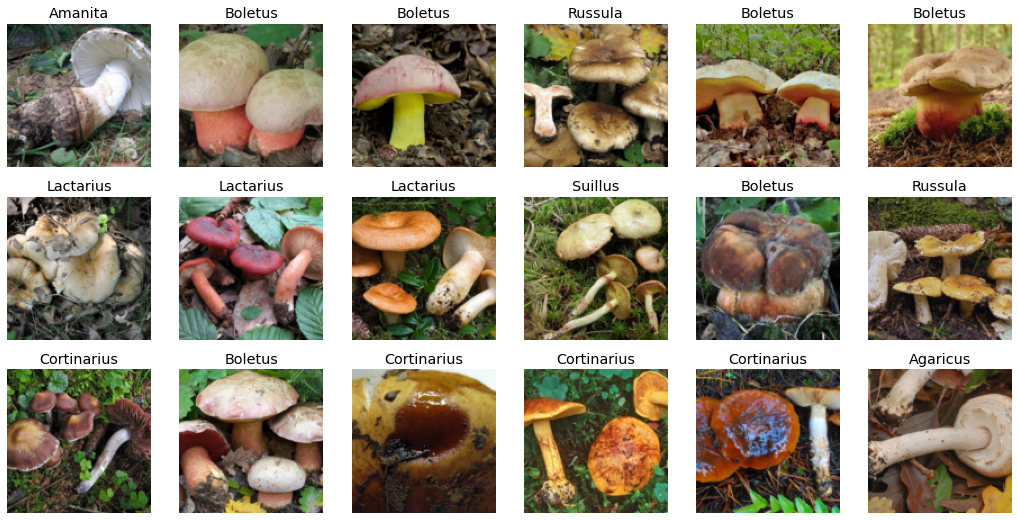

In [ ]:
dls.valid.show_batch(max_n=18, nrows=3)

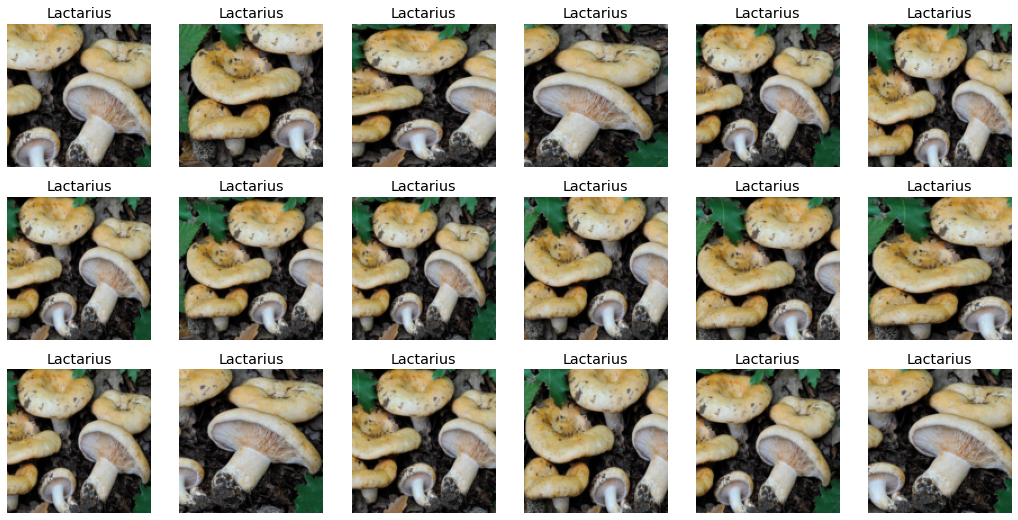

In [ ]:
mushrooms = mushrooms.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = mushrooms.dataloaders(path)
dls.train.show_batch(max_n=18, nrows=3, unique=True)

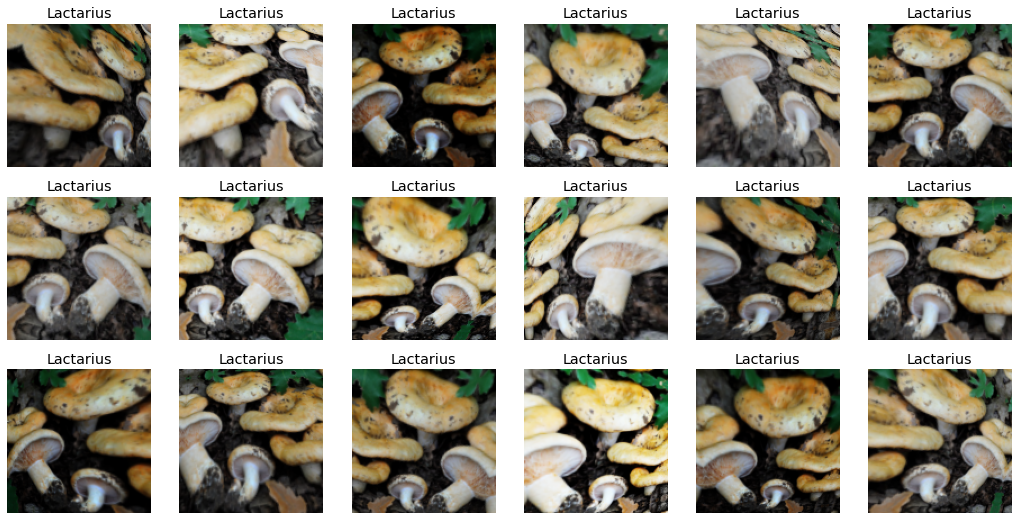

In [ ]:
mushrooms = mushrooms.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = mushrooms.dataloaders(path)
dls.train.show_batch(max_n=18, nrows=3, unique=True)

In [ ]:
mushrooms = mushrooms.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
    batch_tfms=aug_transforms()
)
dls = mushrooms.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
number_of_epochs = 20 
learn.fine_tune(number_of_epochs)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.993675,1.119722,0.338301,01:19


epoch,train_loss,valid_loss,error_rate,time
0,1.222469,0.858028,0.271982,01:19
1,0.974421,0.759554,0.247392,01:19
2,0.796473,0.654188,0.207899,01:19
3,0.663138,0.621011,0.201192,01:19
4,0.525031,0.556891,0.162444,01:19
5,0.420104,0.516872,0.156483,01:19
6,0.363447,0.466178,0.129657,01:19
7,0.295733,0.466484,0.134873,01:19
8,0.225192,0.447641,0.127422,01:20
9,0.203728,0.445078,0.128167,01:20


Save state of model. Requires that you reload the databunch when you spin it up. That means it is just useful, if you want to continue.

Define the name of the model:

In [ ]:
number_of_current_epocs = str((number_of_epochs))
today_time = datetime.today().strftime('%Y-%m-%d-%H-%M-%S')
file_name_weights = today_time + '_epochs_' + number_of_current_epocs
file_name_weights

'2020-12-05-16-21-31_epochs_20'

In [ ]:
# file_name_weights = '2020-12-05-16-21-31_epochs_20'  # load previos generated model weights

Save the model:

In [ ]:
learn.save(file_name_weights)

Path('models/2020-12-05-16-21-31_epochs_20.pth')

Get the name of the model directory where the weights are saved. Usually this is in the folder ``models`` which is in the root directory

In [ ]:
learn.model_dir

'models'


Move the file to different folder: -->

- shutil.move("path/to/current/file", "path/to/new/destination/for/file")

NOTE: if there are multiple files with same name in the start-folder or if there is already a file with the same name in the target-folder, the shift-function doens't work properly. Therefore remove these files first!

In [ ]:
import shutil

In [ ]:
default_dir = "/content/models/" + file_name_weights + ".pth"  # directory specified by fastai
new_root_dir = "/content/gdrive/MyDrive/Colab Notebooks/models_exported/mushroom_detector/"  # specified by me
new_dir = new_root_dir + "models"  # new destination of file

In [ ]:
shutil.move(default_dir, new_dir)

'/content/gdrive/MyDrive/Colab Notebooks/models_exported/mushroom_detector/models/2020-12-05-16-21-31_epochs_20.pth'

Now we have moved the location of the file which contains the saved model weights.

Changing the model directory ``mode_dir`` to the new directory of our saved model weights.

In [ ]:
learn.model_dir = new_dir

Resume training (load the model):

In [ ]:
learn.load(file_name_weights)

If you want to know more about the function, you can do this:

In [ ]:
# ?save
# ??save
# doc(cnn_learner)

Get confusion matrix:

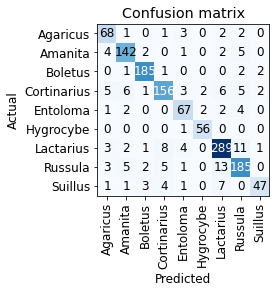

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

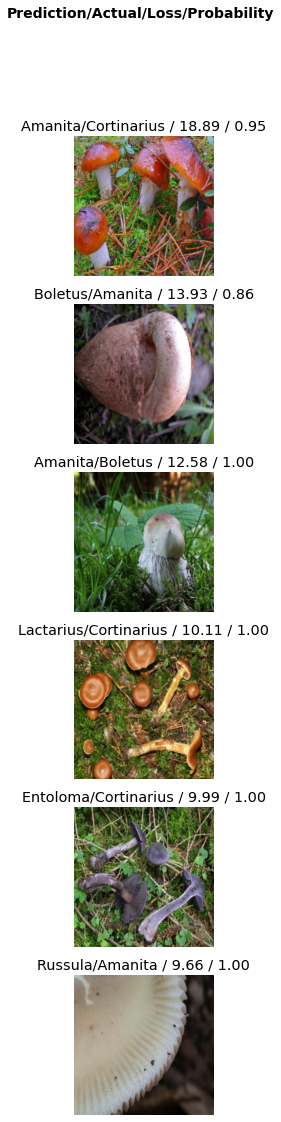

In [ ]:
interp.plot_top_losses(6, nrows=6)

In [ ]:
# cleaner = ImageClassifierCleaner(learn)

Once we are satisfied with our model, we can export the final result as pickle (architekture and parameters):

In [ ]:
# learn.export() # default way

In [ ]:
interference_model_name = today_time + '_export' + '.pkl'

In [ ]:
# interference_model_name = "2020-12-05-16-21-31_export.pkl"  # take previos generated model name

In [ ]:
learn.export(Path(new_root_dir + interference_model_name))

Check if file exist:

In [ ]:
path = Path(new_root_dir) # no argument needed for root directory
path.ls(file_exts='.pkl')

(#1) [Path('/content/gdrive/MyDrive/Colab Notebooks/models_exported/mushroom_detector/2020-12-05-16-21-31_export.pkl')]

# Interference

Load file (not needed since we already have a working ``Learner``)

In [ ]:
learn_inf = load_learner(path/ interference_model_name)

Get prediction for single image:

In [ ]:
path_to_test_image = '/content/images/Mushrooms/Agaricus/000_ePQknW8cTp8.jpg'
learn_inf.predict(path_to_test_image)

('Agaricus',
 tensor(0),
 tensor([9.9993e-01, 6.5168e-05, 1.2847e-09, 3.2527e-07, 7.3706e-07, 4.9882e-09, 8.7109e-10, 2.1708e-09, 1.7713e-09]))

Access the ``DataLoaders`` as an attribute of the ``Learner``. This way we get the index of the predicted categories.

In [ ]:
learn_inf.dls.vocab

['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']

# Creating a notebook app from the model

We need 


*   IPython widgets (ipywidgets): GUI components that bring together JavaScript and Python functionality in a web browser
*   Voila: system for making applications of IPython widgets available to end users, without them having to use Jupyter at all.



In [ ]:
from ipywidgets import *

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

Grap the image

In [ ]:
img = PILImage.create(btn_upload.data[-1])  # only works if you have uploaded an image

Disyplay it

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Now we can get out predictions

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

Use ``Label`` to display result

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Russula; Probability: 0.5168')

We need a button to do the classification

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We need a *click event handler*, that is, a function that will be called when the button is pressed

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_run.on_click(on_click_classify)

You can test the button now by clicking it. First upload a new image, then click it. You should see the image and predictions update automatically!

We can now put all in a vertical box (VBox)

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])


We have written all the code necessary for our app. The next step is to convert it into something we can deploy.